In [1]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", palette="muted")


In [2]:
# load data
df = pd.read_csv("data.csv")


In [3]:
# set a random seed for reproducibility
seed = 29
rnd_state = np.random.RandomState(seed=seed)
class_names = df.class_name.unique().tolist()


In [4]:
# use PRNG to generate weights for each class
weights = rnd_state.rand(len(class_names))
num_orig_samples = df.class_name.value_counts().values

# total number of samples after resampling
total_num_samples = weights.dot(num_orig_samples).astype("int")


In [5]:
# dictionary containing weights for each class
class_weights = dict(zip(class_names, weights))


In [6]:
# create a new dataframe with unbalanced data
unbalanced_df = df.sample(
    n=total_num_samples, weights=df.class_name.map(class_weights), replace=False
)
unbalanced_df


,class_name,class_id,file_name
1151,crystalline,9,crystalline_0134.jpg
385,bubbly,3,bubbly_0111.jpg
429,bubbly,3,bubbly_0138.jpg
728,cobwebbed,6,cobwebbed_0161.jpg
4253,spiralled,35,spiralled_0137.jpg
...,...,...,...
2280,interlaced,19,interlaced_0172.jpg
4519,stained,37,stained_0139.jpg
4442,stained,37,stained_0081.jpg
4235,spiralled,35,spiralled_0051.jpg


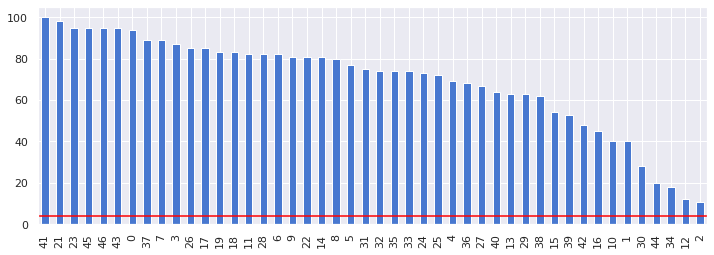

In [7]:
# inspect class labels after resampling
unbalanced_df.class_id.value_counts().plot(figsize=(12, 4), kind="bar")
plt.axhline(y=4, color="red")
plt.show()

In [8]:
# save the dataframe to a CSV file
unbalanced_df.to_csv("unbalanced_data.csv", index=False)
